<a href="https://colab.research.google.com/github/injoon-pij/dlnlp-learning/blob/main/dlnlp_machine_learning_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Machine Learning terms

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_ann.ipynb

위 링크의 __1) ML terms__ 참고

# 2) Linear Regression

텐서플로우와 케라스를 활용한 선형회귀모델 실습
 * 선형회귀에 대한 이론적 내용은 정리 X

---
cf. [인공신경망 다이어그램]

$y = \text{sigmoid}(W_1x_1 + W_2x_2 + W_3x_3 + ... + W_nx_n + b) = \text{σ}(W_1x_1 + W_2x_2 + W_3x_3 + ... + W_nx_n + b)$

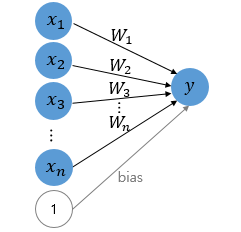

## 2.1 Autograd by tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
w = tf.Variable(2.)

def f(w):
  y = w ** 2
  z = 2 * y + 5
  return z

In [ ]:
with  tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


forward 연산 시 ```with  tf.GradientTape() as tape:``` 안에 연산을 넣으면 연산이 tape에 기록되고, backward 연산 시에는 ```tape.gradient(연산 결과, 미분 변수)``` 를 실행하면 자동미분 기능을 수행함

---
* cf.) 파이토치에서 자동미분을 실행하려면 텐서를 선언할 때는, ```requires_grad``` 인자를 True로 설정하면 됨 (텐서에 대한 기울기 저장 선언)
 * ```w = torch.tensor(2.0, requires_grad=True)```

## 2.2 Linear Regression by tf autograd

In [ ]:
# 학습될 가중치 변수 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [ ]:
# forward
def hypothesis(x):
  return W * x + b

In [ ]:
# ex
x_test = [3.5, 5, 5.5 ,6]

print(hypothesis(x_test))
print(hypothesis(x_test).numpy())

tf.Tensor([15. 21. 23. 25.], shape=(4,), dtype=float32)
[15. 21. 23. 25.]


In [ ]:
# data
X = [1,2,3,4,5,6,7,8,9]
y = [11,22,33,44,53,66,77,87,95]

# loss function
def mse_loss(y_pred, y):
  # 두 값의 차를 제곱한 뒤 그것들의 평균 계산
  return tf.reduce_mean(tf.square(y_pred - y))

# optimizer
optimizer = tf.optimizers.SGD(0.01)

In [ ]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=-0.023300886>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14644244>]

In [ ]:
for i in range(301):

  with tf.GradientTape() as tape:
    y_pred = hypothesis(X)
    cost = mse_loss(y_pred, y) # cost

  # backward
  gradients = tape.gradient(cost, [W, b])
  # optimizer
  optimizer.apply_gradients(zip(gradients, [W, b])) # parameter update

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [ ]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


## 2.3 Linear Regression by Keras

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
# data
X = [1,2,3,4,5,6,7,8,9]
y = [11,22,33,44,53,66,77,87,95]

In [ ]:
model = Sequential() # 모델 선언

# output_dim = 1, input_dim = 1. 선형 회귀이므로 activation = 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# define optimizer
sgd = optimizers.SGD(lr=0.01)

# loss function = MSE
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# train
model.fit(X,y, batch_size=1, epochs=10, shuffle=False)

Epoch 1/10
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1460 - mse: 2.1460
Epoch 4/10
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1460 - mse: 2.1460
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1460 - mse: 2.1460
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1460 - mse: 2.1460
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1460 - mse: 2.1460
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1460 - mse: 2.1460
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1460 - mse: 2.1460


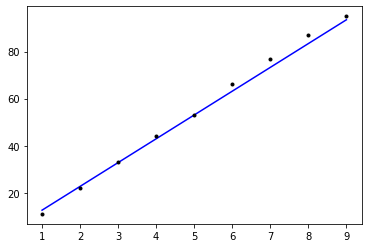

In [ ]:
# visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
# predict (unseen data)
print(model.predict([9.5]))

[[98.556465]]


---
* 입력벡터의 차원이 2차원 이상인 다중선형회귀분석(Multivariable Linear Regression) 실습

|Midterm(x1)|Final(x2)|Added point(x3)|Score($1000)(y)|
|:---------:|:-------:|:-------------:|:-------------:|
|70         |85       |11             |73             |
|71         |89       |18             |82             |
|50         |80       |20             |72             |
|99         |20       |10             |57             |
|50         |10       |10             |34             |
|20         |99       |10             |58             |
|40         |50       |20             |56             |

* 상위 5개 데이터는 훈련에, 나머지 2개 데이터는 검증에 사용

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
# data
X = np.array([[70,85,11],
              [71,89,18],
              [50,80,20],
              [99,20,10],
              [50,10,10]])
y = np.array([73,82,72,57,34])

In [ ]:
# model
model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

# optimizer
sgd=optimizers.SGD(lr=0.00001)

# loss function = MSE
model.compile(optimizer = sgd ,loss='mse',metrics=['mse'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# train
model.fit(X,y, batch_size=1, epochs=10, shuffle=False)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184


[참고]

|Midterm(x1)|Final(x2)|Added point(x3)|Score($1000)(y)|
|:---------:|:-------:|:-------------:|:-------------:|
|70         |85       |11             |73             |
|71         |89       |18             |82             |
|50         |80       |20             |72             |
|99         |20       |10             |57             |
|50         |10       |10             |34             |
|20         |99       |10             |58             |
|40         |50       |20             |56             |

In [ ]:
# predict
print(model.predict(X))

[[72.848755]
 [81.96083 ]
 [72.1204  ]
 [57.11359 ]
 [33.831833]]


In [ ]:
# test
X_test = np.array([[20,99,10],
                   [40,50,20]])

print(model.predict(X_test))

[[57.80222 ]
 [56.133743]]


# 3) Logistic Regression

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_logistic_regression.ipynb

이론적 내용은 위 링크의 __1) Logistic Regression__ 참고

## 3.1 Logistic Regression by Keras

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
# data
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid')) # sigmoid

# optimizer =  SGD
# Loss function = binary_crossentropy(이진 크로스 엔트로피)
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy', metrics=['binary_accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# train
model.fit(X,y, batch_size=1, epochs=10, shuffle=False)

Epoch 1/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0877 - binary_accuracy: 1.0000
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0876 - binary_accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0874 - binary_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0872 - binary_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0870 - binary_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0868 - binary_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0866 - binary_accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0865 - binary_accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0863 - binary_accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 0s

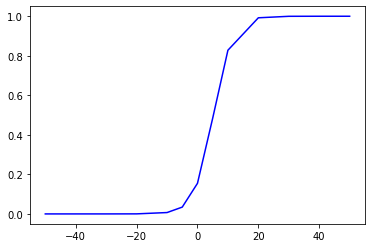

In [ ]:
plt.plot(X, model.predict(X), 'b') # 'b' : 파란색 선 그래프

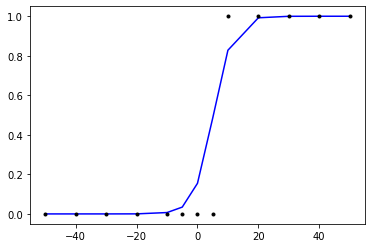

In [ ]:
plt.plot(X, model.predict(X), 'b', X, y, 'k.') # 'k.' : 검은색 점 그래프

* $X$ 값이 5와 10사이의 어떤 값일때 $y$ 값이 0.5가 넘기 시작하는 것처럼 보임 
* 따라서 $X$ 값이 적어도 5일때는 $y$ 값이 0.5보다 작고, $X$ 값이 10일 때는 $y$ 값이 0.5를 넘을 것으로 예상

In [ ]:
# test
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.2024807 ]
 [0.26040196]
 [0.32807618]
 [0.4037371 ]
 [0.44363382]]
[[0.8697728 ]
 [0.9943406 ]
 [0.99978375]
 [0.9999918 ]
 [1.        ]]


---
* 입력벡터의 차원이 2차원 이상인 다중로지스틱회귀분석(Multivariable Logistic Regression) 실습

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import optimizers 

In [ ]:
# data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# model
model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) # input_dim = 2

# optimizer = SGD
# Loss function = binary_crossentropy(이진 크로스 엔트로피)
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])

In [ ]:
# train
model.fit(X, y, batch_size=1, epochs=10, shuffle=False)

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2029 - binary_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - binary_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2026 - binary_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2025 - binary_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2024 - binary_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2022 - binary_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2021 - binary_accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2019 - binary_accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2018 - binary_accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
# test
print(model.predict(X)) # y = np.array([0, 1, 1, 1])

[[0.39089486]
 [0.83909285]
 [0.88825667]
 [0.98475444]]


# 4) Vector and Matrix Manipulation

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_basic.ipynb

위 링크 참고

# 5) Softmax Regression

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_softmax_regression.ipynb

이론적 내용은 위 링크의 __2) Softmax Regression 이해하기__ 참고

---
cf. [인공신경망 다이어그램]

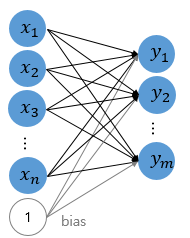

## 5.1 Softmax Regression by Keras

아이리스 데이터들의 특성을 통해 아이리스 품종을 분류하는 문제

### 5.1.1 Data Summary

In [1]:
import pandas as pd
data = pd.read_csv('./iris.csv',encoding='latin1')

In [ ]:
print(len(data))
print(data[:5])

150
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [ ]:
print("품종 종류:", data["variety"].unique())

품종 종류: ['Setosa' 'Versicolor' 'Virginica']


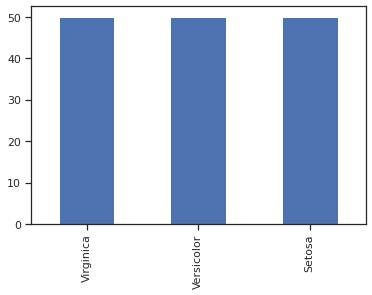

In [ ]:
# 품종에 따른 데이터 분포 확인
import matplotlib.pyplot as plt

data['variety'].value_counts().plot(kind='bar') # 데이터 분포 : 1 : 1 : 1 

그래프를 그려 데이터를 좀 더 자세히 살펴보자

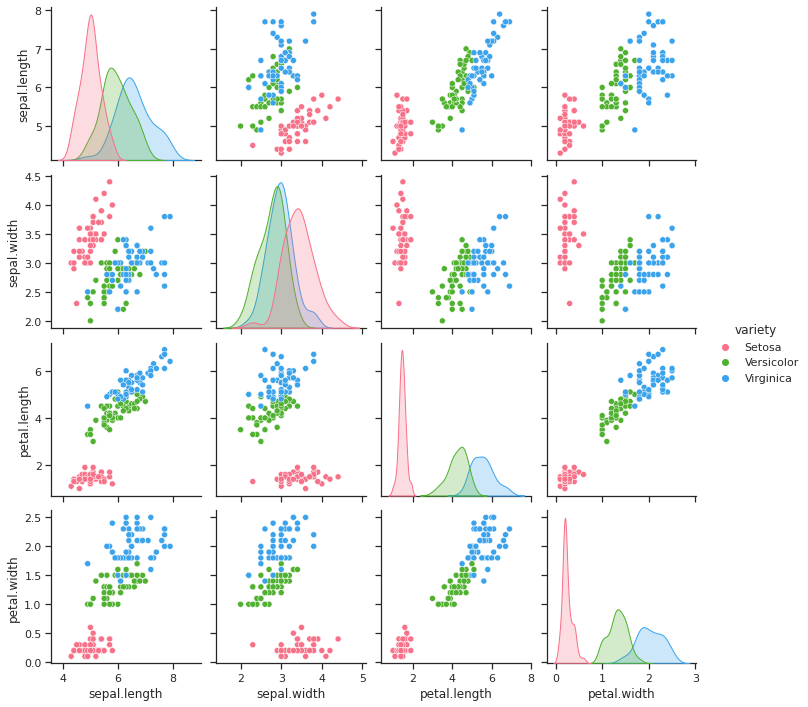

In [ ]:
# visualization : scatter plot
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="variety", palette="husl")

* 위 산점도는 3가지 품종의 아이리스 데이터들의 4개의 특성에 따른 분포를 나타냄
* ```sns.pairplot```은 데이터프레임을 인수로 받아 데이터프레임의 각 열의 조합에 따라서 산점도(scatter plot)을 그려줌
* 같은 데이터 쌍의 경우에는 히스토그램으로 나타냄

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


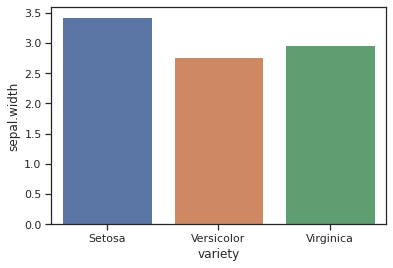

In [ ]:
# 품종과 어떠한 특성(sepa.width)에 대한 연관 관계
sns.barplot(data['variety'], data['sepal.width'], ci=None)

* 위의 막대그래프는 품종과 sepa.width 특성 간의 연관관계를 나타냄
* ```sns.barplot```은 연관관계를 나타내는 막대그래프를 그려줌

### 5.1.2 Data preprocessing

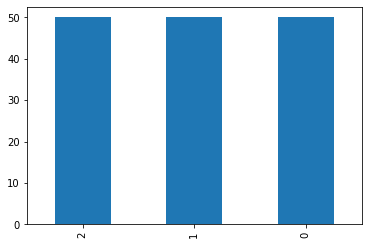

In [3]:
# Integer encoding
data['variety'] = data['variety'].replace(['Virginica','Setosa','Versicolor'], [0,1,2])

# 인코딩 결과 확인
data['variety'].value_counts().plot(kind='bar')

In [4]:
# Split data

from sklearn.model_selection import train_test_split
data_X = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
data_y = data['variety'].values

# train : test = 8 : 2 (shuffle data)
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

print(X_train[:5])
print(y_train[:5])
print()
print(X_test[:5])
print(y_test[:5])

[[6.1 3.  4.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]]
[2 0 2 0 0]

[[5.8 4.  1.2 0.2]
 [5.1 2.5 3.  1.1]
 [6.6 3.  4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2. ]]
[1 2 2 1 0]


In [5]:
# One-hot encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print()
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### 5.1.3 Softmax Regression

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# model
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax')) # 4 feature -> 3 variety

# optimizer = adam
# loss function = categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [9]:
# train
history = model.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9750 - val_loss: 0.1824 - val_accuracy: 1.0000
Epoch 2/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1548 - accuracy: 0.9583 - val_loss: 0.1781 - val_accuracy: 1.0000
Epoch 3/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9667 - val_loss: 0.1713 - val_accuracy: 1.0000
Epoch 4/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9750 - val_loss: 0.1693 - val_accuracy: 1.0000
Epoch 5/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1537 - accuracy: 0.9667 - val_loss: 0.1684 - val_accuracy: 1.0000
Epoch 6/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1531 - accuracy: 0.9667 - val_loss: 0.1809 - val_accuracy: 0.9667
Epoch 7/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.9583 - val_loss: 0.1798 - val_accuracy: 1.0000
Epoch 

* 이진 분류 문제와 달리 다중 클래스 분류 문제에서는 손실함수로 'categorical_crossentropy' 사용
* ```validation_data=()```에 테스트 데이터를 기재해주면 실제로는 훈련에는 반영되지 않으면서 각 훈련 횟수마다 테스트 데이터에 대한 손실값/정확도를 출력해줌
* loss/accuracy 는 훈련데이터에 대한 손실값/정확도, val_loss/val_accuracy 는 테스트데이터에 대한 손실값/정확도 

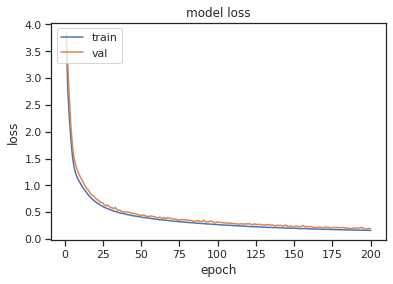

In [ ]:
# 에폭 당 손실값 그래프 시각화
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

* ```history.history``` 에는 ```model.fit```의 결과인 epoch당 loss, accuracy, val_loss, val_accuracy 가 담겨있음

In [ ]:
# 테스트 데이터에 대한 정확도 출력
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1])) # [0] : loss, [1] : accuracy

1/1 [==============================] - 0s 153ms/step - loss: 0.1905 - accuracy: 1.0000

 테스트 정확도: 1.0000
